# International Roughness Index (IRI) calculation data

### 1. Open Dataset
The dataset we will use, which has been previously mined: 
- Centerline_IRI_2019_2_20200518.shp in https://gisportal.binamarga.pu.go.id/arcgis/rest/services/ maybe licensed

In [28]:
# Import necessary modules
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from cartopy import crs as ccrs

# Set filepath
fp = "/home/aulia/Documents/python/netCDF python/Plotting CAMS nitrogen dioxide products/Centerline_IRI_2019_2_20200518.shp"

# Read road data file
data = gpd.read_file(fp)

### 2. Let’s see check the data type of it
Preparing and explore data

In [29]:
type(data) #Check type of data 

geopandas.geodataframe.GeoDataFrame

### 3. Overview data
Let’s take a look at our data and print the first 2 rows:

In [30]:
print(data.head())

  LINKID  STA_FROM_D  STA_TO_DAM  MAX_IRI  MEAN_IRI  MAX_IRI_PO  MEAN_IRI_P  \
0  01001           0          10     3.91    3.6600        3.91      3.6600   
1  01001          10          20     3.93    3.6000        3.93      3.6000   
2  01001          20          30     3.66    3.3925        3.66      3.3925   
3  01001          30          40     3.81    3.6800        3.81      3.6800   
4  01001          40          50     3.80    3.5950        3.80      3.5950   

    SHAPE_LEN                             NM_RUAS  \
0  100.000023  KRUENG RAYA - BTS. KOTA BANDA ACEH   
1  100.000014  KRUENG RAYA - BTS. KOTA BANDA ACEH   
2   99.999946  KRUENG RAYA - BTS. KOTA BANDA ACEH   
3   99.999977  KRUENG RAYA - BTS. KOTA BANDA ACEH   
4  100.000040  KRUENG RAYA - BTS. KOTA BANDA ACEH   

                                            geometry  
0  LINESTRING Z (-2191395.741 602207.111 -0.000, ...  
1  LINESTRING Z (-2191306.982 602252.328 -0.000, ...  
2  LINESTRING Z (-2191223.740 602307.744 

### 5. Check Plot
Let’s try it out, and take a look how our data looks like on a map:

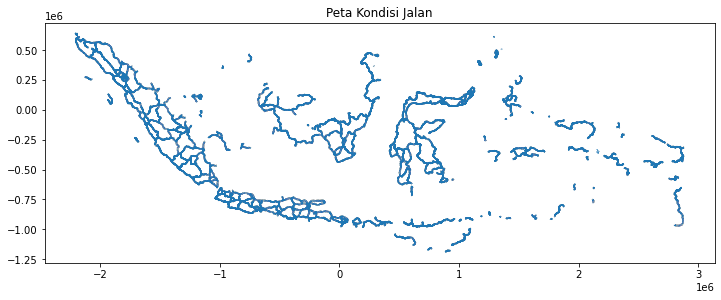

In [33]:
# create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# add roads to the plot
data.plot(ax=ax, alpha=.5)

# add a title for the plot
ax.set_title("Peta Kondisi Jalan");

### 6. Check Coordinate System
Let’s check:

In [36]:
# Check the coordinate reference system
data.crs

<Derived Projected CRS: PROJCS["Indonesia Lambert Conformal Conic",GEOGCS[ ...>
Name: Indonesia Lambert Conformal Conic
Axis Info [cartesian]:
- [east]: Easting (Meter)
- [north]: Northing (Meter)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Conic Conformal (2SP)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### 6. Plot Again
Let’s check: